## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 86s 1us/step


In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    # 此 處仿照範例，在input、output(softmax)之間，建立三個全連接層做隱藏層
    # 之前直接從第一層隱藏層(Dense層)開始，在建構式裡指定input_dim
    # 但也可以從keras.engine.input_layer.Input()明確地建立input layer開始
    # 這種做法應該就是所謂的functional model
    input_layer = keras.engine.input_layer.Input(shape=[x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0716 11:53:02.085521 4672902592 deprecation_wrapper.py:119] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 11:53:02.151838 4672902592 deprecation_wrapper.py:119] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 11:53:02.190356 4672902592 deprecation_wrapper.py:119] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
"""
Compile 模型
"""
# optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0716 11:54:25.210731 4672902592 deprecation_wrapper.py:119] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 11:54:25.222640 4672902592 deprecation_wrapper.py:119] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 11:54:30.578949 4672902592 deprecation.py:323] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 11:54:30.658189 4672902592 deprecation_wrapper.py:119] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 196us/step - loss: 2.2577 - acc: 0.1697 - val_loss: 2.2047 - val_acc: 0.2153
Epoch 2/500
50000/50000 [==============================] - 8s 164us/step - loss: 2.1638 - acc: 0.2353 - val_loss: 2.1290 - val_acc: 0.2505
Epoch 3/500
50000/50000 [==============================] - 8s 164us/step - loss: 2.1005 - acc: 0.2617 - val_loss: 2.0775 - val_acc: 0.2638
Epoch 4/500
50000/50000 [==============================] - 9s 173us/step - loss: 2.0558 - acc: 0.2768 - val_loss: 2.0387 - val_acc: 0.2815
Epoch 5/500
50000/50000 [==============================] - 9s 172us/step - loss: 2.0219 - acc: 0.2913 - val_loss: 2.0089 - val_acc: 0.2938
Epoch 6/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.9952 - acc: 0.2994 - val_loss: 1.9847 - val_acc: 0.2971
Epoch 7/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.9730 - acc: 0.3088 - val_loss: 1

50000/50000 [==============================] - 8s 159us/step - loss: 1.6617 - acc: 0.4219 - val_loss: 1.6665 - val_acc: 0.4212
Epoch 60/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.6586 - acc: 0.4237 - val_loss: 1.6648 - val_acc: 0.4208
Epoch 61/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.6555 - acc: 0.4252 - val_loss: 1.6613 - val_acc: 0.4221
Epoch 62/500
50000/50000 [==============================] - 9s 190us/step - loss: 1.6531 - acc: 0.4245 - val_loss: 1.6595 - val_acc: 0.4224
Epoch 63/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.6500 - acc: 0.4260 - val_loss: 1.6563 - val_acc: 0.4251
Epoch 64/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.6469 - acc: 0.4276 - val_loss: 1.6542 - val_acc: 0.4242
Epoch 65/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.6442 - acc: 0.4288 - val_loss: 1.6514 - val_acc: 0.4236
Epoch 66/500
50000/50000 [======

50000/50000 [==============================] - 8s 156us/step - loss: 1.5283 - acc: 0.4683 - val_loss: 1.5518 - val_acc: 0.4534
Epoch 118/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.5264 - acc: 0.4692 - val_loss: 1.5507 - val_acc: 0.4536
Epoch 119/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.5249 - acc: 0.4696 - val_loss: 1.5493 - val_acc: 0.4529
Epoch 120/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.5231 - acc: 0.4708 - val_loss: 1.5480 - val_acc: 0.4560
Epoch 121/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.5212 - acc: 0.4700 - val_loss: 1.5464 - val_acc: 0.4563
Epoch 122/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.5193 - acc: 0.4719 - val_loss: 1.5446 - val_acc: 0.4578
Epoch 123/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.5178 - acc: 0.4720 - val_loss: 1.5462 - val_acc: 0.4552
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 8s 157us/step - loss: 1.4347 - acc: 0.5004 - val_loss: 1.4842 - val_acc: 0.4736
Epoch 176/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.4336 - acc: 0.5007 - val_loss: 1.4816 - val_acc: 0.4747
Epoch 177/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.4317 - acc: 0.5021 - val_loss: 1.4817 - val_acc: 0.4730
Epoch 178/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.4301 - acc: 0.5027 - val_loss: 1.4815 - val_acc: 0.4737
Epoch 179/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.4286 - acc: 0.5025 - val_loss: 1.4784 - val_acc: 0.4766
Epoch 180/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.4269 - acc: 0.5032 - val_loss: 1.4776 - val_acc: 0.4796
Epoch 181/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.4258 - acc: 0.5034 - val_loss: 1.4769 - val_acc: 0.4769
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 8s 158us/step - loss: 1.3552 - acc: 0.5269 - val_loss: 1.4346 - val_acc: 0.4906
Epoch 234/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3543 - acc: 0.5273 - val_loss: 1.4312 - val_acc: 0.4907
Epoch 235/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.3526 - acc: 0.5278 - val_loss: 1.4299 - val_acc: 0.4901
Epoch 236/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.3511 - acc: 0.5281 - val_loss: 1.4314 - val_acc: 0.4917
Epoch 237/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.3502 - acc: 0.5286 - val_loss: 1.4308 - val_acc: 0.4889
Epoch 238/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.3483 - acc: 0.5294 - val_loss: 1.4294 - val_acc: 0.4913
Epoch 239/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.3471 - acc: 0.5299 - val_loss: 1.4297 - val_acc: 0.4909
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 8s 158us/step - loss: 1.2852 - acc: 0.5508 - val_loss: 1.3988 - val_acc: 0.4996
Epoch 292/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.2831 - acc: 0.5525 - val_loss: 1.3951 - val_acc: 0.5033
Epoch 293/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.2823 - acc: 0.5522 - val_loss: 1.3944 - val_acc: 0.5057
Epoch 294/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.2813 - acc: 0.5526 - val_loss: 1.3938 - val_acc: 0.5047
Epoch 295/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.2795 - acc: 0.5531 - val_loss: 1.3938 - val_acc: 0.5042
Epoch 296/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.2790 - acc: 0.5528 - val_loss: 1.3932 - val_acc: 0.5050
Epoch 297/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.2778 - acc: 0.5540 - val_loss: 1.3927 - val_acc: 0.5067
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 8s 158us/step - loss: 1.2203 - acc: 0.5742 - val_loss: 1.3730 - val_acc: 0.5148
Epoch 350/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.2198 - acc: 0.5744 - val_loss: 1.3706 - val_acc: 0.5143
Epoch 351/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.2183 - acc: 0.5758 - val_loss: 1.3732 - val_acc: 0.5104
Epoch 352/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.2178 - acc: 0.5774 - val_loss: 1.3739 - val_acc: 0.5118
Epoch 353/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.2172 - acc: 0.5751 - val_loss: 1.3711 - val_acc: 0.5111
Epoch 354/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.2151 - acc: 0.5762 - val_loss: 1.3698 - val_acc: 0.5167
Epoch 355/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.2143 - acc: 0.5777 - val_loss: 1.3698 - val_acc: 0.5120
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 8s 158us/step - loss: 1.1598 - acc: 0.5972 - val_loss: 1.3577 - val_acc: 0.5170
Epoch 408/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.1594 - acc: 0.5956 - val_loss: 1.3525 - val_acc: 0.5212
Epoch 409/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.1578 - acc: 0.5969 - val_loss: 1.3543 - val_acc: 0.5183
Epoch 410/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1569 - acc: 0.5976 - val_loss: 1.3551 - val_acc: 0.5214
Epoch 411/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.1565 - acc: 0.5966 - val_loss: 1.3527 - val_acc: 0.5211
Epoch 412/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1548 - acc: 0.5986 - val_loss: 1.3528 - val_acc: 0.5233
Epoch 413/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.1541 - acc: 0.5975 - val_loss: 1.3520 - val_acc: 0.5211
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 6s 127us/step - loss: 1.1010 - acc: 0.6168 - val_loss: 1.3471 - val_acc: 0.5230
Epoch 466/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.0997 - acc: 0.6174 - val_loss: 1.3442 - val_acc: 0.5235
Epoch 467/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0987 - acc: 0.6188 - val_loss: 1.3441 - val_acc: 0.5277
Epoch 468/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0980 - acc: 0.6186 - val_loss: 1.3443 - val_acc: 0.5285
Epoch 469/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.0969 - acc: 0.6188 - val_loss: 1.3462 - val_acc: 0.5246
Epoch 470/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0956 - acc: 0.6196 - val_loss: 1.3413 - val_acc: 0.5274
Epoch 471/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.0952 - acc: 0.6191 - val_loss: 1.3418 - val_acc: 0.5279
Epoch 472/500
50000/50000 [

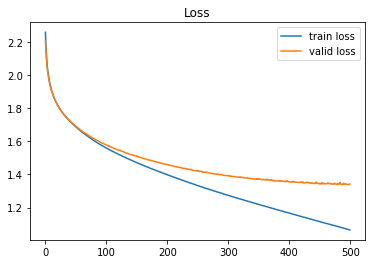

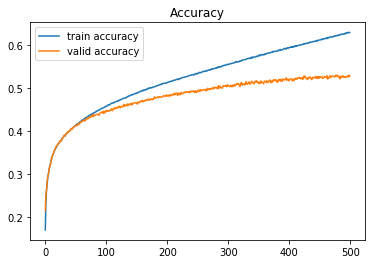

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### Answer:

- 以adam為optimazer, epoch = 500，loss及accuracy的變化情況如下

![Loss](images/d77/adam_500_loss.png)

![Accuracy](images/d77/adam_500_accuracy.png)

- 以sgd為optimazer, epoch = 500，loss及accuracy的變化情況如下

![Loss](images/d77/sgd_500_loss.png)

![Accuracy](images/d77/sgd_500_accuracy.png)